### 폰트 설치

In [29]:
!sudo apt install fonts-nanum

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
from os.path import join as pjoin

In [2]:
matplotlib.font_manager._rebuild()
matplotlib.rcParams['font.family'] ='NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [3]:
ROOT_PATH = os.path.abspath("..")

DATA = pjoin(ROOT_PATH, "data")
RAW_DATA = pjoin(DATA, "raw")
PROC_DATA = pjoin(DATA, "proc")

## 2015 ~ 2020 저서무척추 데이터 정리

In [7]:
invert = pd.read_csv(pjoin(RAW_DATA, '수원시데이터_저서무척추_2005_2020_전국.csv'))
invert

,id,위도,경도,한글과명,한글보통명,학명,조사연도,조사일자,개체수
0,32381,37.301556,126.984500,모기과,숲모기류,Aedes sp.,2019,2019-05-16,1
1,30207,37.312402,127.020045,모기과,숲모기류,Aedes sp.,2015,2015-11-09,1
2,35639,37.300306,126.944611,왕잠자리과,긴무늬왕잠자리,Aeschnophlebia longistigma,2019,2019-05-13,1
3,32009,37.247389,127.018727,왕잠자리과,왕잠자리류,Aeshnidae sp.,2020,2020-10-19,1
4,30949,37.247389,127.018727,왕잠자리과,왕잠자리류,Aeshnidae sp.,2020,2020-10-19,1
...,...,...,...,...,...,...,...,...,...
6684,32602,37.263944,126.989000,물땡땡이과,애넓적물땡땡이,Enochrus (Holcophilydrus) simulans,2016,2016-06-14,1
6685,30975,37.254961,127.009031,돌거머리과,돌거머리,Erpobdella lineata,2016,2016-04-25,1
6686,33316,37.311778,126.982028,장구애비과,장구애비,Laccotrephes japonensis,2019,2019-10-14,1
6687,33078,37.252722,126.994583,실지렁이과,실지렁이,Limnodrilus gotoi,2020,2020-07-21,1


In [8]:
def get_dataset_by_year(data, year):
    data = data[data['조사연도'] == year][['한글과명']].sort_values(by=['한글과명'])
    data = data.drop_duplicates(['한글과명'], ignore_index=True)

    result = pd.DataFrame()
    result[f'{year}'] = data['한글과명']
    result = result.reset_index(drop=True)
    return result

In [9]:
invert_2015 = get_dataset_by_year(invert, 2015)
invert_2016 = get_dataset_by_year(invert, 2016)
invert_2017 = get_dataset_by_year(invert, 2017)
invert_2018 = get_dataset_by_year(invert, 2018)
invert_2019 = get_dataset_by_year(invert, 2019)
invert_2020 = get_dataset_by_year(invert, 2020)

In [10]:
invert_2015

,2015
0,가재과
1,각날도래과
2,각다귀과
3,갈래하루살이과
4,강도래과
5,거머리과
6,깔따구과
7,꼬마하루살이과
8,나비날도래과
9,납작하루살이과


## 2015 ~ 2020 연속해서 관측되는 데이터 확인

In [11]:
ninvert_2015_by_year = invert[invert['조사연도'] == 2015].groupby(by=['한글과명', '조사연도'], as_index=False).sum()
invert_2015 = pd.merge(invert_2015, ninvert_2015_by_year, left_on='2015', right_on='한글과명')[['2015', '개체수']]

ninvert_2016_by_year = invert[invert['조사연도'] == 2016].groupby(by=['한글과명', '조사연도'], as_index=False).sum()
invert_2016 = pd.merge(invert_2016, ninvert_2016_by_year, left_on='2016', right_on='한글과명')[['2016', '개체수']]

ninvert_2017_by_year = invert[invert['조사연도'] == 2017].groupby(by=['한글과명', '조사연도'], as_index=False).sum()
invert_2017 = pd.merge(invert_2017, ninvert_2017_by_year, left_on='2017', right_on='한글과명')[['2017', '개체수']]

ninvert_2018_by_year = invert[invert['조사연도'] == 2018].groupby(by=['한글과명', '조사연도'], as_index=False).sum()
invert_2018 = pd.merge(invert_2018, ninvert_2018_by_year, left_on='2018', right_on='한글과명')[['2018', '개체수']]

ninvert_2019_by_year = invert[invert['조사연도'] == 2019].groupby(by=['한글과명', '조사연도'], as_index=False).sum()
invert_2019 = pd.merge(invert_2019, ninvert_2019_by_year, left_on='2019', right_on='한글과명')[['2019', '개체수']]

ninvert_2020_by_year = invert[invert['조사연도'] == 2020].groupby(by=['한글과명', '조사연도'], as_index=False).sum()
invert_2020 = pd.merge(invert_2020, ninvert_2020_by_year, left_on='2020', right_on='한글과명')[['2020', '개체수']]


In [12]:
invert_2020

,2020,개체수
0,각다귀과,24
1,거머리과,14
2,깔따구과,405
3,꼬마하루살이과,256
4,나방파리과,2
5,나비날도래과,2
6,날도래과,3
7,넙적거머리과,94
8,네모집날도래과,29
9,논우렁이과,40


In [13]:
invert_2015.rename(columns={'개체수' : '개수_2015'}, inplace=True)
invert_2016.rename(columns={'개체수' : '개수_2016'}, inplace=True)
invert_2017.rename(columns={'개체수' : '개수_2017'}, inplace=True)
invert_2018.rename(columns={'개체수' : '개수_2018'}, inplace=True)
invert_2019.rename(columns={'개체수' : '개수_2019'}, inplace=True)
invert_2020.rename(columns={'개체수' : '개수_2020'}, inplace=True)

In [38]:
ko_year_count=pd.concat([ko_to_2015,ko_to_2016,ko_to_2017,ko_to_2018,ko_to_2019,ko_to_2020],axis=1)

In [14]:
entire_inv_names = invert['한글과명'].unique()

data = pd.DataFrame()
data['분류명'] = entire_inv_names

for y, f_year in zip(range(2015, 2021), [invert_2015, invert_2016, invert_2017, invert_2018, invert_2019, invert_2020]):
    data = pd.merge(left=data, right=f_year, left_on='분류명', right_on=f'{y}')
data

,분류명,2015,개수_2015,2016,개수_2016,2017,개수_2017,2018,개수_2018,2019,개수_2019,2020,개수_2020
0,모기과,모기과,32,모기과,10,모기과,11,모기과,17,모기과,19,모기과,2
1,왕잠자리과,왕잠자리과,10,왕잠자리과,8,왕잠자리과,5,왕잠자리과,11,왕잠자리과,6,왕잠자리과,7
2,물방개과,물방개과,23,물방개과,11,물방개과,17,물방개과,20,물방개과,14,물방개과,17
3,넙적거머리과,넙적거머리과,26,넙적거머리과,29,넙적거머리과,23,넙적거머리과,14,넙적거머리과,63,넙적거머리과,94
4,석패과,석패과,3,석패과,10,석패과,57,석패과,90,석패과,32,석패과,59
5,물장군과,물장군과,37,물장군과,27,물장군과,39,물장군과,36,물장군과,33,물장군과,48
6,소금쟁이과,소금쟁이과,29,소금쟁이과,31,소금쟁이과,31,소금쟁이과,26,소금쟁이과,89,소금쟁이과,195
7,물벌레과,물벌레과,2,물벌레과,6,물벌레과,13,물벌레과,14,물벌레과,9,물벌레과,209
8,물잠자리과,물잠자리과,10,물잠자리과,20,물잠자리과,8,물잠자리과,13,물잠자리과,25,물잠자리과,44
9,물달팽이과,물달팽이과,124,물달팽이과,122,물달팽이과,112,물달팽이과,141,물달팽이과,333,물달팽이과,266


## 각 년도별 데이터 비율 구하기

In [15]:
print(f"2015년 관측된 개체 수: {data['개수_2015'].sum()}")
print(f"2016년 관측된 개체 수: {data['개수_2016'].sum()}")
print(f"2017년 관측된 개체 수: {data['개수_2017'].sum()}")
print(f"2018년 관측된 개체 수: {data['개수_2018'].sum()}")
print(f"2019년 관측된 개체 수: {data['개수_2019'].sum()}")
print(f"2020년 관측된 개체 수: {data['개수_2020'].sum()}")

2015년 관측된 개체 수: 1444
2016년 관측된 개체 수: 1440
2017년 관측된 개체 수: 1297
2018년 관측된 개체 수: 1373
2019년 관측된 개체 수: 4370
2020년 관측된 개체 수: 4975


In [16]:
sum_of_2015 = data['개수_2015'].sum()
sum_of_2016 = data['개수_2016'].sum()
sum_of_2017 = data['개수_2017'].sum()
sum_of_2018 = data['개수_2018'].sum()
sum_of_2019 = data['개수_2019'].sum()
sum_of_2020 = data['개수_2020'].sum()

In [17]:
data['개수_2015'] = data['개수_2015'].apply(lambda x: x / sum_of_2015)
data['개수_2016'] = data['개수_2016'].apply(lambda x: x / sum_of_2016)

data['개수_2017'] = data['개수_2017'].apply(lambda x: x / sum_of_2017)
data['개수_2018'] = data['개수_2018'].apply(lambda x: x / sum_of_2018)


data['개수_2019'] = data['개수_2019'].apply(lambda x: x / sum_of_2019)
data['개수_2020'] = data['개수_2020'].apply(lambda x: x / sum_of_2020)

In [18]:
data.drop(columns=['2015', '2016', '2017', '2018', '2019', '2020'], inplace=True)
data.rename(columns={'개수_2015' : '2015',
                    '개수_2016' : '2016',
                    '개수_2017' : '2017', 
                    '개수_2018' : '2018',
                    '개수_2019' : '2019',
                    '개수_2020' : '2020',}, inplace=True)

In [19]:
data

,분류명,2015,2016,2017,2018,2019,2020
0,모기과,0.022161,0.006944,0.008481,0.012382,0.004348,0.000402
1,왕잠자리과,0.006925,0.005556,0.003855,0.008012,0.001373,0.001407
2,물방개과,0.015928,0.007639,0.013107,0.014567,0.003204,0.003417
3,넙적거머리과,0.018006,0.020139,0.017733,0.010197,0.014416,0.018894
4,석패과,0.002078,0.006944,0.043948,0.065550,0.007323,0.011859
5,물장군과,0.025623,0.018750,0.030069,0.026220,0.007551,0.009648
6,소금쟁이과,0.020083,0.021528,0.023901,0.018937,0.020366,0.039196
7,물벌레과,0.001385,0.004167,0.010023,0.010197,0.002059,0.042010
8,물잠자리과,0.006925,0.013889,0.006168,0.009468,0.005721,0.008844
9,물달팽이과,0.085873,0.084722,0.086353,0.102695,0.076201,0.053467


## 데이터 시각화

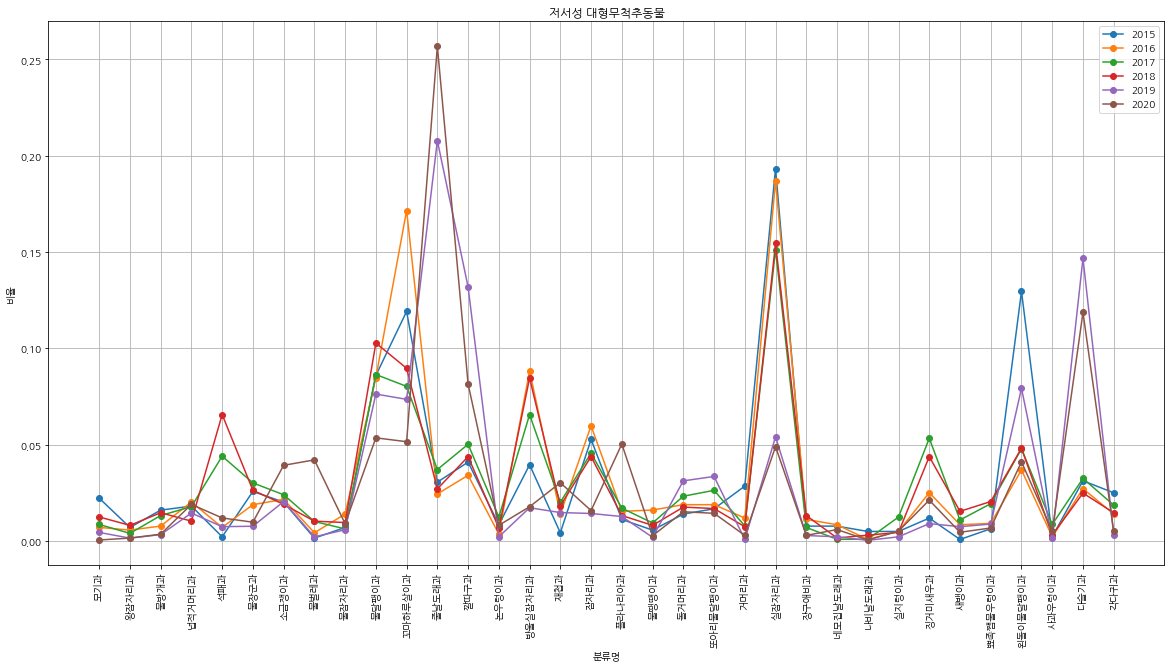

In [21]:
plt.figure(figsize=(20,10)) # 그래프 크기 조정 default size는 (6.4,4.4)

plt.plot('분류명', '2015', 'o-', data = data, label = '2015')

plt.plot('분류명', '2016', 'o-', data = data, label = '2016')
plt.plot('분류명', '2017', 'o-', data = data, label = '2017')
plt.plot('분류명', '2018', 'o-', data = data, label = '2018')
plt.plot('분류명', '2019', 'o-', data = data, label = '2019')

plt.plot('분류명', '2020', 'o-', data = data, label = '2020')

plt.xlabel('분류명')
plt.xticks(rotation=90)
plt.ylabel('비율')
plt.title('저서성 대형무척추동물')

plt.legend()
plt.grid()
plt.show()

## 데이터 저장

In [22]:
data.to_csv(pjoin(PROC_DATA, '수원시_연도별_저서무척추(scaled).csv'), index=False) 